<a href="https://colab.research.google.com/github/zots0127/Colabs/blob/main/ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

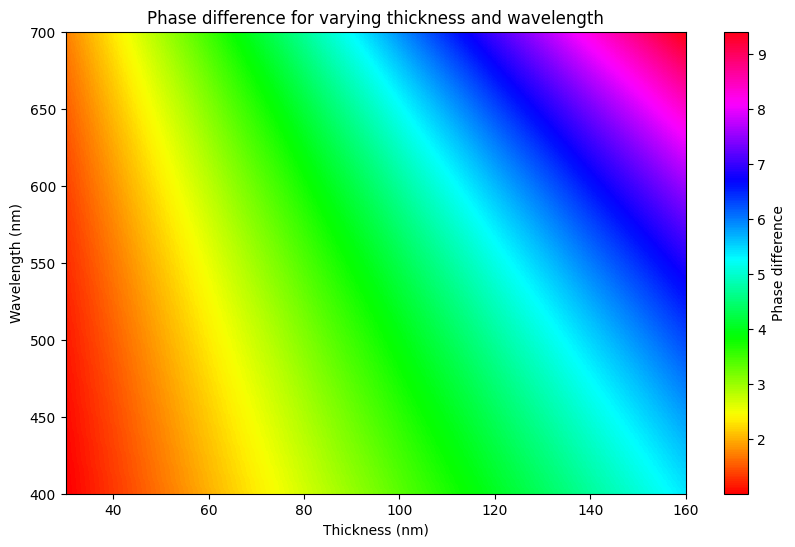

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def phase_difference(theta1, n1, n2, d, lambda_):
    theta2 = np.arcsin(n1/n2 * np.sin(theta1))
    delta_x = 2 * n2 * d * np.cos(theta2)
    delta = 2 * np.pi * delta_x / lambda_
    return delta

n1 = 1.0  # refraction index of incidence medium (e.g., air)
n2 = 2.0  # refraction index of thin film (e.g., ITO)
theta1 = np.pi / 4  # incidence angle (45 degrees)

lambda_range = np.linspace(400, 700, 301)  # Wavelength range of visible light in nm

d_range = np.arange(30, 161)  # Thickness range in nm from 30 to 160 with step 1

d_grid, lambda_grid = np.meshgrid(d_range, lambda_range)

delta_grid = phase_difference(theta1, n1, n2, d_grid, lambda_grid)

plt.figure(figsize=(10, 6))
plt.imshow(delta_grid, extent=[d_range.min(), d_range.max(), lambda_range.min(), lambda_range.max()], 
           aspect='auto', cmap='hsv')
plt.colorbar(label='Phase difference')
plt.xlabel('Thickness (nm)')
plt.ylabel('Wavelength (nm)')
plt.title('Phase difference for varying thickness and wavelength')
plt.show()


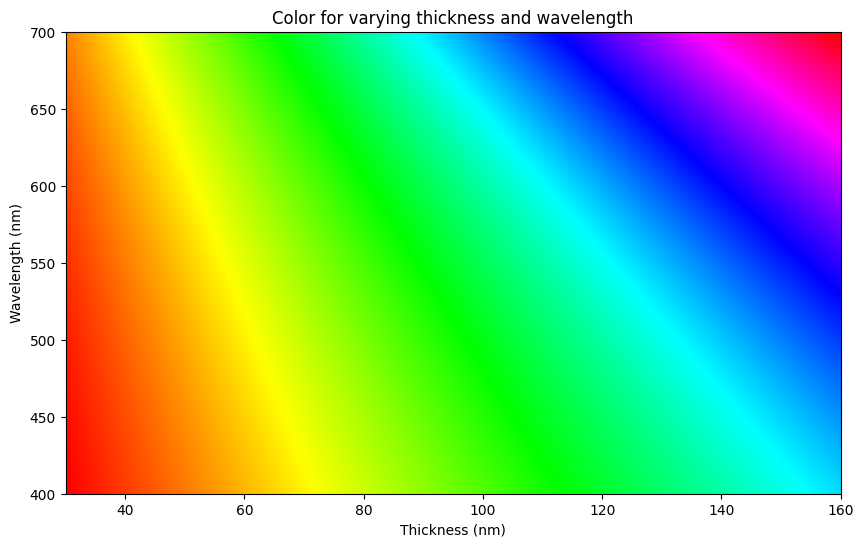

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

def phase_difference(theta1, n1, n2, d, lambda_):
    theta2 = np.arcsin(n1/n2 * np.sin(theta1))
    delta_x = 2 * n2 * d * np.cos(theta2)
    delta = 2 * np.pi * delta_x / lambda_
    return delta

n1 = 1.0  # refraction index of incidence medium (e.g., air)
n2 = 2.0  # refraction index of thin film (e.g., ITO)
theta1 = np.pi / 4  # incidence angle (45 degrees)

lambda_range = np.linspace(400, 700, 301)  # Wavelength range of visible light in nm
d_range = np.arange(30, 161)  # Thickness range in nm from 30 to 160 with step 1

d_grid, lambda_grid = np.meshgrid(d_range, lambda_range)
delta_grid = phase_difference(theta1, n1, n2, d_grid, lambda_grid)

# Normalize the phase difference to [0, 1]
delta_norm = (delta_grid - delta_grid.min()) / (delta_grid.max() - delta_grid.min())

# Convert phase difference to HSV color
hsv_image = np.zeros((*delta_norm.shape, 3))
hsv_image[..., 0] = delta_norm  # Hue
hsv_image[..., 1] = 1.0  # Saturation
hsv_image[..., 2] = 1.0  # Value

# Convert HSV to RGB
rgb_image = hsv_to_rgb(hsv_image)

plt.figure(figsize=(10, 6))
plt.imshow(rgb_image, extent=[d_range.min(), d_range.max(), lambda_range.min(), lambda_range.max()], aspect='auto')
plt.xlabel('Thickness (nm)')
plt.ylabel('Wavelength (nm)')
plt.title('Color for varying thickness and wavelength')
plt.show()


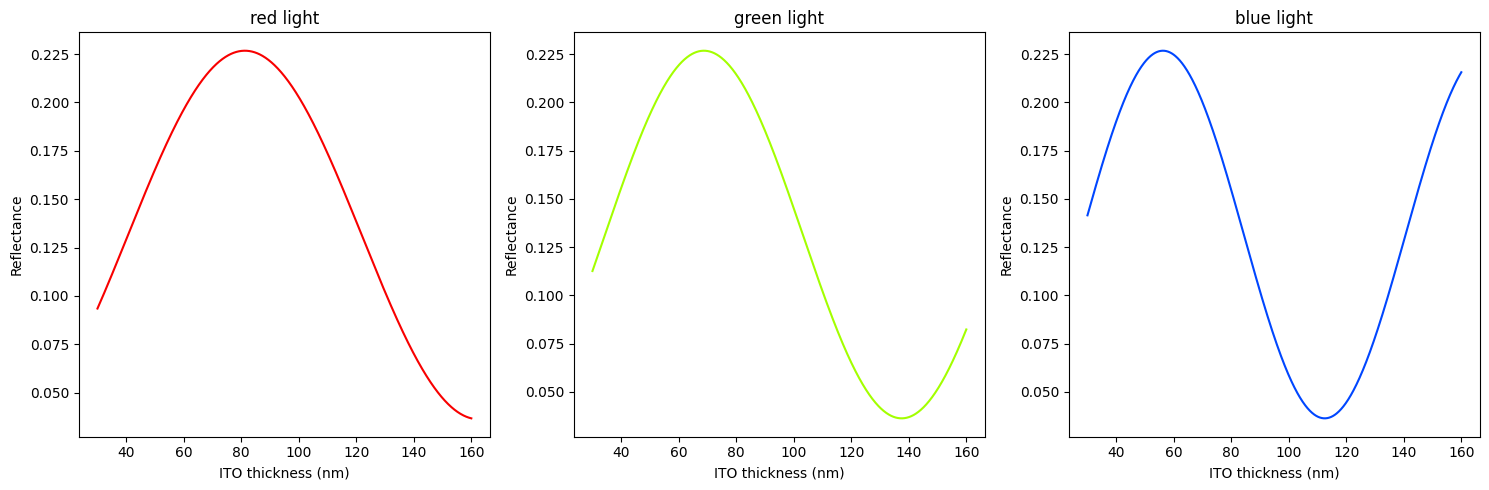

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# wavelength_to_rgb function as defined earlier

def reflectance(n1, n2, n3, wavelength, thickness):
    # Compute the reflectance using the formula for thin film interference
    k = 2 * np.pi / wavelength
    r12 = (n1 - n2) / (n1 + n2)
    r23 = (n2 - n3) / (n2 + n3)
    return np.abs(r12 + r23 * np.exp(2j * n2 * k * thickness))**2

# Define the refractive index for ITO, glass and air
n1 = 1  # air
n3 = 1.5  # glass
n2 = 2  # ITO

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the thickness range
thickness = np.linspace(30e-9, 160e-9, 1000)  # in meters

# Define the wavelength for red, green and blue light
wavelengths = [650e-9, 550e-9, 450e-9]  # in meters
colors = ['red', 'green', 'blue']

for ax, wavelength, color in zip(axes, wavelengths, colors):
    # Compute the reflectance
    R = reflectance(n1, n2, n3, wavelength, thickness)

    # Convert the wavelength to RGB
    rgb = wavelength_to_rgb(wavelength * 1e9)

    # Plot the reflectance
    ax.plot(thickness * 1e9, R, color=rgb)  # thickness in nm
    ax.set_title(f'{color} light')
    ax.set_xlabel('ITO thickness (nm)')
    ax.set_ylabel('Reflectance')

plt.tight_layout()
plt.show()


In [3]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' This function is an approximation which was found on the web'''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R, G, B)


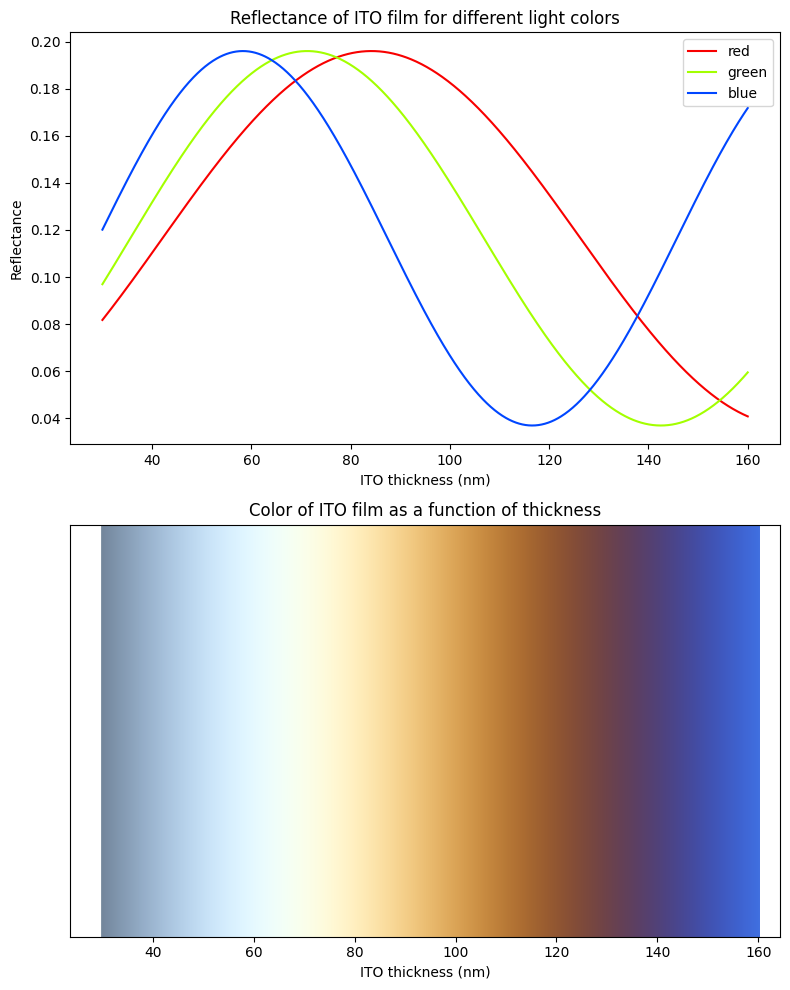

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# wavelength_to_rgb function as defined earlier

def reflectance(n1, n2, n3, wavelength, thickness):
    # Compute the reflectance using the formula for thin film interference
    k = 2 * np.pi / wavelength
    r12 = (n1 - n2) / (n1 + n2)
    r23 = (n2 - n3) / (n2 + n3)
    return np.abs(r12 + r23 * np.exp(2j * n2 * k * thickness))**2

# Define the refractive index for ITO, glass and air
n1 = 1  # air
n3 = 1.5  # glass
n2 = 1.93  # ITO

# Set up the figure
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Define the thickness range
thickness = np.linspace(30e-9, 160e-9, 1000)  # in meters

# Define the wavelength for red, green and blue light
wavelengths = [650e-9, 550e-9, 450e-9]  # in meters
colors = ['red', 'green', 'blue']

# Initialize an array to store the RGB values
rgb_values = np.zeros((len(thickness), 3))

for wavelength, color in zip(wavelengths, colors):
    # Compute the reflectance
    R = reflectance(n1, n2, n3, wavelength, thickness)

    # Convert the wavelength to RGB
    rgb = np.array(wavelength_to_rgb(wavelength * 1e9))

    # Add the RGB values to the array, weighted by the reflectance
    rgb_values += R[:, np.newaxis] * rgb

    # Plot the reflectance
    axes[0].plot(thickness * 1e9, R, color=rgb, label=color)  # thickness in nm

# Normalize the RGB values
rgb_values /= rgb_values.max(axis=0)

# Plot the color as a function of thickness
for t, rgb in zip(thickness, rgb_values):
    axes[1].axvline(t * 1e9, color=rgb, linewidth=2)  # thickness in nm

axes[0].set_title('Reflectance of ITO film for different light colors')
axes[0].set_xlabel('ITO thickness (nm)')
axes[0].set_ylabel('Reflectance')
axes[0].legend()

axes[1].set_title('Color of ITO film as a function of thickness')
axes[1].set_xlabel('ITO thickness (nm)')
axes[1].set_yticks([])

plt.tight_layout()
plt.show()
